**Student's name:**   Wenyu Liu   
**Sciper Number:**   367634

In [1]:
# Install scipy package
#! pip install scipy

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from scipy.signal import convolve2d, get_window

## 1 Discrete Fourier Transform - DFT

The DFT $X\left(f\right)$ of a signal $x\left(n \right)$ of length $N$ is given by:
$$
X\left(f\right) = \sum_{n = n_0}^{n_0 + N - 1} x\left(n \right) W_{N}^{-kn}
$$

and its inverse transform is given by:

$$
x\left(n \right) = \frac{1}{N} \sum_{k = 0}^{N - 1} X\left(k\right)  W_{N}^{kn}
$$

where $W_{N} = \text{exp}\left(j\frac{2\pi}{N}\right)$.

## 1.1 DFT Basis

The first equation above shows how the signal $x$ is projected on a set of basis functions. Identify the functions of that basis.

**Your answer here ...**

The basis functions are defined by the term 
$$W_{N}^{-kn} = \text{exp}\left(-\text{j}\frac{2\pi k n}{N}\right) = \cos \left(\frac{2\pi k n}{N}\right) - \text{j} \sin\left(\frac{2\pi k n}{N}\right)$$

## 1.2 DFT of a vector from this basis

The signal $x_w(n)$ is defined as $x_w(n) = w(n) \cdot x(n)$, where $w(n)$ is a rectangular window of size $N = 100$ and $x(n) = cos\left( \frac{2 \pi f n}{f_s} \right)$ with $f = 18$ Hz and $f_s = 300$ Hz.

Compute and plot the DFT of the signal $x_w(n)$, the signal $x(n)$ windowed by a rectangle, using the command `plt.stem(...)`. Comment on the spectrum you obtain by expressing the $x(n)$ in term of its decomposition onto the DFT basis. Can the siganl $x(n)$ be perfectly represented in the basis ?

*Hint:*
- *Using the spectrum, find for which value(s) of **k** it is not zero and __explain__ why.*
- *The window can be generated using the command `get_window(...)`, details about parameters can be found in the scipy documentation.*

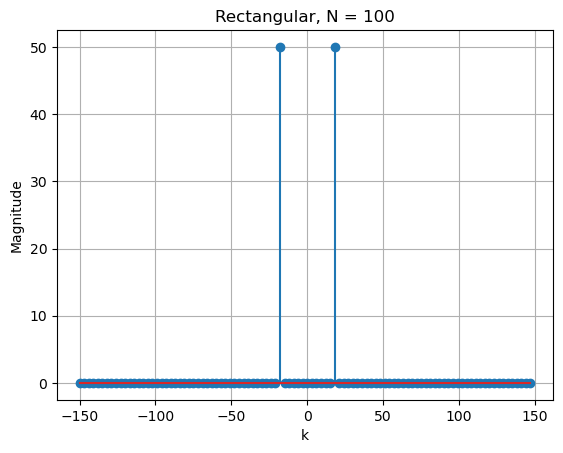

In [3]:
# Your answer here ...
fs = 300
f = 18
N = 100
w = get_window('boxcar', N)
n = np.arange(N)-N/2
x = np.cos(2*np.pi*f*n/fs)
xw = x*w
Xw = np.fft.fft(xw)
Xw_freq = np.fft.fftfreq(n.size, d = 1/fs)
plt.stem(Xw_freq,np.absolute(Xw))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Rectangular, N = %d'%N)
plt.grid()
plt.show()

**Answer of 1.2 -** In the DFT spectrum, we can observe peaks at k=$\pm$18, which are the frequencies corresponding to the cosine signal's frequency components ($\pm$18 Hz) without any side lobes . Therefore, the basis represented the signal perfectly, which means we can reconstruct the signal from the DFT of it.

## 1.3 Window length

Consider now a rectangle window with a different length, use $N = 99$. Can the new signal $x_w(n)$ be perfectly represented in the basis ? Compute and plot the DFT to verify it and comment on the spectrum you obtain.

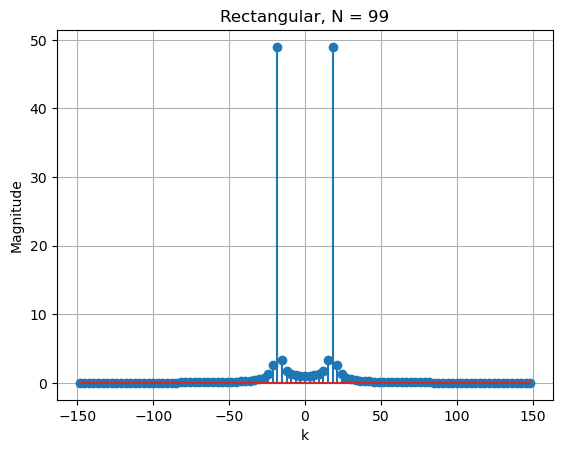

In [4]:
# Your answer here ...
fs = 300
f = 18

# Rectangle, N = 99 
N = 99
w = get_window('boxcar', N)
n = np.arange(N)-N/2
x = np.cos(2*np.pi*f*n/fs)
xw = x*w
Xw = np.fft.fft(xw)
Xw_freq = np.fft.fftfreq(n.size, d = 1/fs)
plt.stem(Xw_freq,np.absolute(Xw))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Rectangular, N = %d'%N)
plt.grid()
plt.show()

**Answer of 1.3 -** In the DFT spectrum, we can observe two high peaks at k = $\pm$18 with some small side lobes near them. Therefore, the basis can NOT represented the signal perfectly.

## 1.4 Type of window

Repeat the two previous steps with the following parameters:

- Triangular window of length $N = 100$
- Triangular window of length $N = 99$
- Blackman-Harris window of length $N = 100$
- Blackman-Harris window of length $N = 99$

For each case, plot the windowed signal $x_w(n)$ along its DFT. Be sure to properly scale the axis. Moreover, can the windowed signal be represented in the DFT basis ? Compare your results with the one you got with the rectangular window. Explain why you get such spectrum for each window.

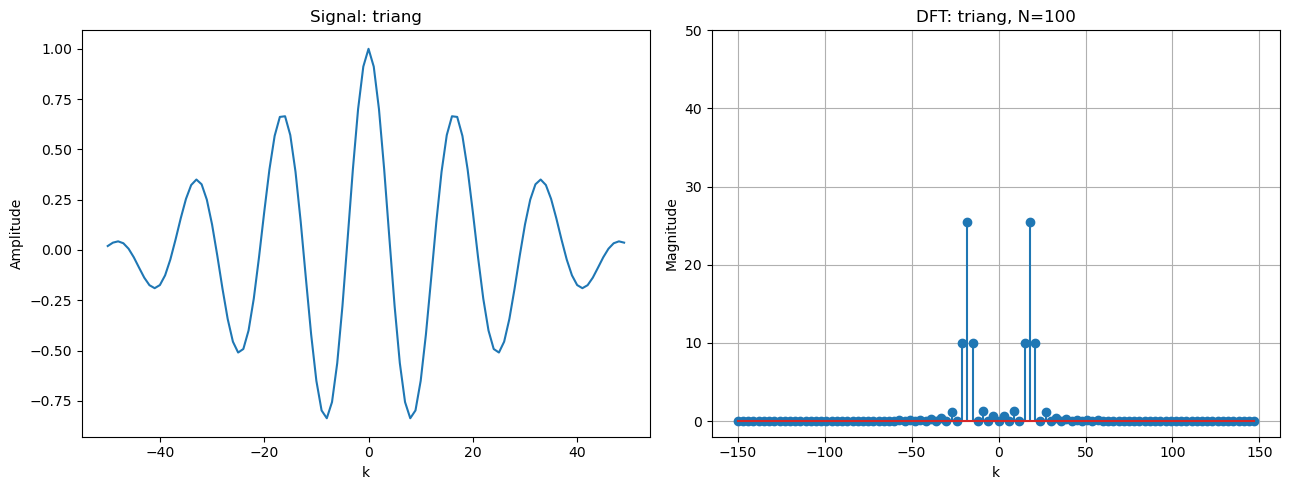

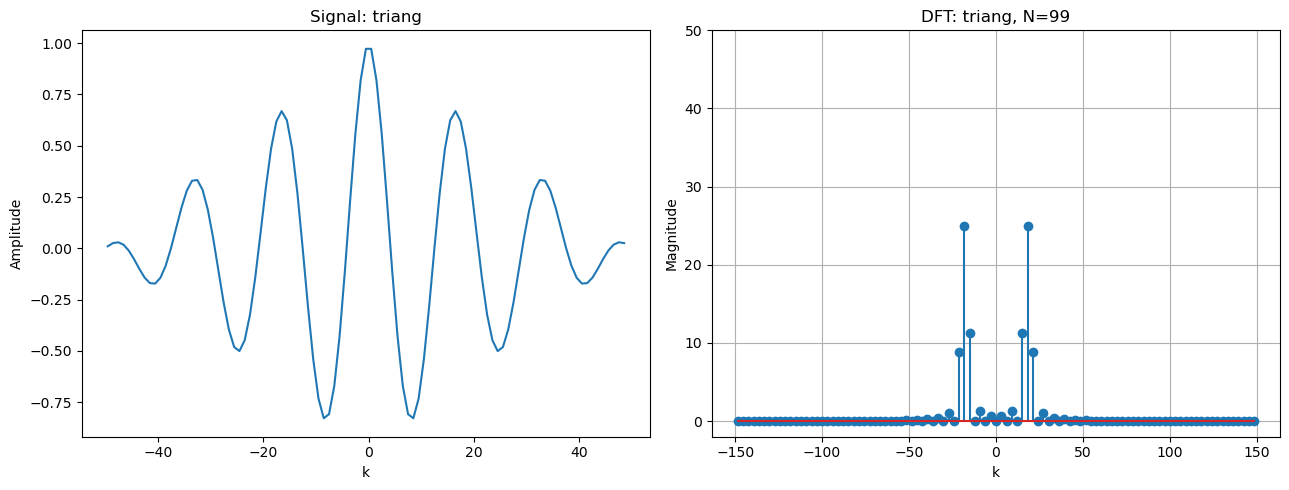

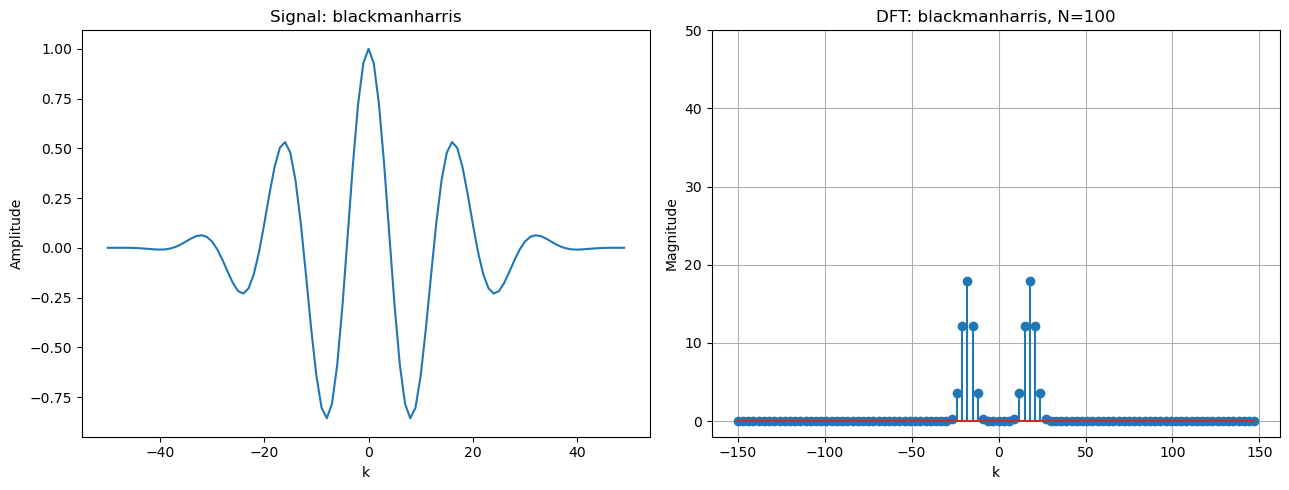

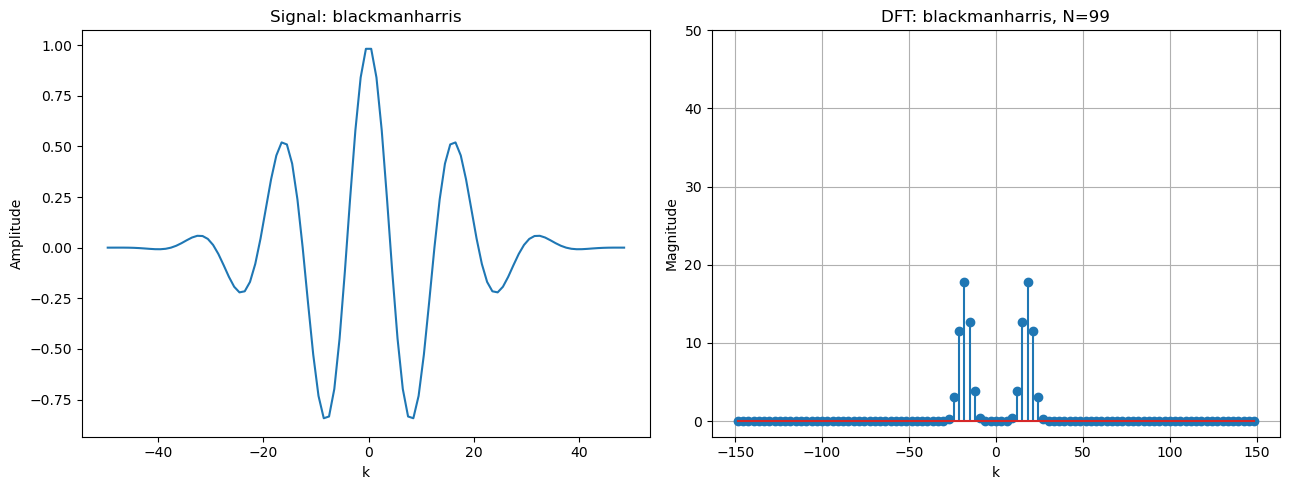

In [5]:
# Your answer here ...

def dft_compute_plot(window_type, N, f, fs):
    n = np.arange(N)
    #w = get_window(window_type, N)
    w = get_window(window_type, N)
    n = np.arange(N)-N/2
    x = np.cos(2 * np.pi * f * n / fs)
    xw = x*w
    Xw = np.fft.fft(xw)
    Xw_freq = np.fft.fftfreq(n.size, d=1/fs)

    # Plot the windowed signal
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.plot(n, xw)
    plt.title(f'Signal: {window_type}')
    plt.xlabel('k')
    plt.ylabel('Amplitude')

    # Plot the DFT spectrum
    plt.subplot(1, 2, 2)
    plt.stem(Xw_freq, np.absolute(Xw))
    plt.title(f'DFT: {window_type}, N={N}')
    plt.ylim(-2,50)
    plt.xlabel('k')
    plt.ylabel('Magnitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

f = 18
fs = 300

# Cases
window_types = ['triang', 'triang', 'blackmanharris', 'blackmanharris']
window_lengths = [100, 99, 100, 99]

for i in range(len(window_types)):
    dft_compute_plot(window_types[i], window_lengths[i], f, fs)


Moreover, can the windowed signal be represented in the DFT basis ? Compare your results with the one you got with the rectangular window. Explain why you get such spectrum for each window.



**Answer of 1.4 -** 

Yes, it can be represented in the DFT basis, but there are more side lobes in the DFT diagrames. When compared to DFT of the rectangular windowed signals, the height of the peaks at $k=\pm 18$ decreases. And when $N=99$, the odd length of the windows cause asymmetry of peaks in DFT diagrames.

## 2. 2D discrete Fourier Transform and Convolution

In this section, we will review the important relationship between the Fourier Transform and the Convolution operation. We will illustrate the concepts in 2D. 

#### 2.1. Impulse response and transfer function

Let's consider a linear single-input single-output time-invariant system $h$ that takes as input a greyscale image $y$ and outputs a new greyscale image $v$, as depicted in Fig.1.

<p align="center">
<img src="images/illusq2-1.png" width="500px" align="centre" /> <br />
Fig. 1 - System representation
</p>

The input and the ouput of the system are related by the convolution operation, denoted by $*$. The output is the convolution of the input $y$ with the impulse response of the system $h$, i.e. $v = y * h$. In 2D, the convolution operator is defined for each output point $(n, m)$ as :

$
\begin{aligned}
    v\left(n, m\right)  & = \left(y * h\right)\left( n, m \right) \\
                        & = \sum_{o=-\infty}^{+\infty}\sum_{p=-\infty}^{+\infty} h\left(o, p\right) y\left(n-o, m-p\right)
\end{aligned}
$

This equation gives the expression of each pixel $(n,m)$ of the output image with respect to the input image and the system. The Fourier Transform and the convolution operation are related by an important property, which is 

$
\begin{aligned}
V\left(k, l\right) & = \mathcal{F}\left(v\right)\\
                & = \mathcal{F}\left(y * h \right) \\
                & = \mathcal{F}\left(y\right)\mathcal{F}\left(h\right) \\
                & =   Y\left(k, l\right)H\left(k, l\right)
\end{aligned}
$

where $k, l$ are the frequencies in the 2D plane, $\mathcal{F}$ is the Fourier transform operator and $V\left(k, l\right), Y\left(k, l\right), H\left(k, l\right)$ are the Fourier transform of $v\ , y\ , h$ respectively. .

In the Fourier domain, the convolution turns into a simple multiplication of the Fourier transforms $Y(k, l)$ and $H(k, l)$. The function $H(k, l)$ is defined as the transfer function of the system $h$. In this exercise, we will show that the calculations of $v\left(n, m\right)$ with these two solutions are equivalent.




#### 2.2. Time domain

Let's start by defining our system $h(n,m)$. It is a 2D Gaussian filter of variance 7  of size $(N_1, N_2) = (19, 19)$. Write a function `gkernel` that takes as inputs the number of points of the filter and the variance, and outputs the 2D impulse response `h`. Plot this filter with the module `matplotlib.pyplot` imported in the first cell of the notebook.


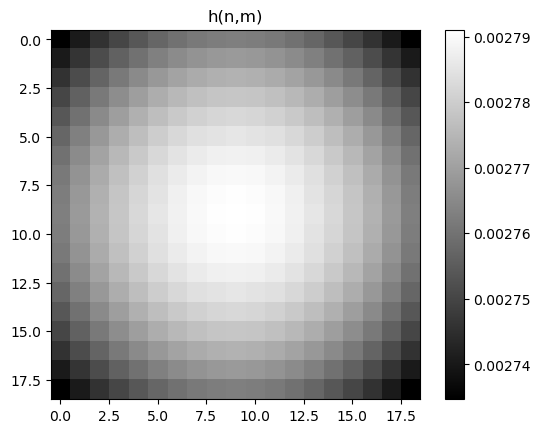

In [6]:
def gkernel(N,  var):
    #pass
    # Your answer here ...
    x, y = np.meshgrid(np.linspace(-1, 1, N), np.linspace(-1, 1, N))
    kernel = np.exp(-(x**2 + y**2) / (2 * var**2))
    kernel /= np.sum(kernel)

    return kernel

# Your answer here ...
N = 19
var = 7
h = gkernel(N, var)
plt.imshow(h, cmap = 'gray')
plt.title('h(n,m)')
plt.colorbar()
plt.show()

Using the definition of the convolution operation, what is the mathematical expression of the convolution with our kernel? Specifically, what are the limits of the sums? Why?

It should be :  
$$
\begin{aligned}
    v\left(n, m\right)  & = \left(y * h\right)\left( n, m \right) \\
                        & = \sum_{o=0}^{273}\sum_{p=0}^{273} h\left(o, p\right) y\left(n-o, m-p\right)
\end{aligned}
$$  
The lower limits equal to 0, and the upper limits (273) equal to $ (256+19-1)-1$ .  
Because we must calculate the DFT with $N_y + N_h -1$ points.

Now that we have our system, we need an input. We will use the image *monkey.png* of Fig.2.

<p align="center">
<img src="images/monkey.png" width="500px" align="centre" /> <br />
Fig.2 - Monkey </p>


First, load this image with the module `matplotlib.image` and plot it in greyscale with `matplotlib.pyplot`. What is the size $(M1, M2)$ of the image ?

The size of the input image (M1, M2):  (256, 256)


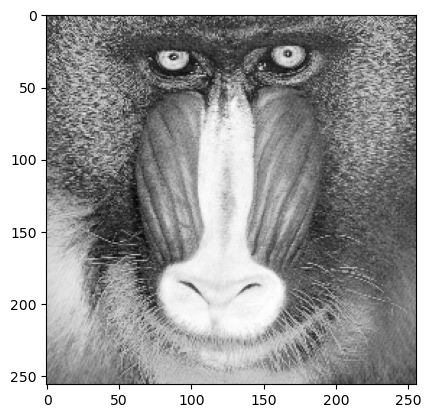

In [7]:
# Your answer here ...
monkey = mpimg.imread('images/monkey.png')
plt.imshow(monkey, cmap = 'gray')
print('The size of the input image (M1, M2): ', monkey.shape)

Finally, let's compute the output of the system $v_t$. Use the function `convolve2d(...)` from `scipy.signal` package with the argument `mode='full'` to compute the 2D convolution between the input image $y$ and the system impulse response $h$. Plot it in greyscale with `matplotlib.pyplot`. What is the size $(L1, L2)$ of the output image ?

The size of the output image (L1, L2):  (274, 274)


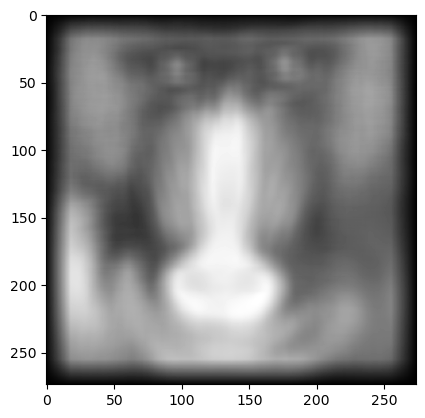

In [8]:
# Your answer here ...
vt = convolve2d(monkey,h,mode = 'full')
plt.imshow(vt, cmap = 'gray')
print('The size of the output image (L1, L2): ', vt.shape)



From the definition of the convolution operation:
- What is the main effect of the transformation on the image ? Explain.
- Explain the size of the output image. What is the mathematical relation between the input and output dimensions ?
- From a computational complexity, what is the most efficient way of implementing the convolution operation ?

**Answer of 2.2 -** 
 - The image becomes blurry. Because the convolution computes the weighted sum of pixel values in the input image over a neighborhood defined by the filter.
 - The size of the output is (274,274), which equals to (256,256)+(19,19)-(1,1). In the 'full' convolution mode, the output size is given by $(M1+N1−1,M2+N2−1)$ points, which computes the convolution over the entire range of overlap between the input image and the filter.
 - It should be using FFT(fast fourier transform), because convolution in the spatial domain is equivalent to multiplication in the frequency domain.

#### 2.3 Frequency domain

Now, let's compute the output $v_f$ through the Fourier domain. Compute the 2D Fourier Transforms of the input $y$ and the filter impulse response $h$ respectively. You have to specify the number of point in the final Fourier Transform, which is $(L_1, L_2)$ in our case. Plot the absolute value of each Fourier Transform in logarithm scale. Then, compute the output signal $v_f$ and plot the result next to the previous $v_t$.

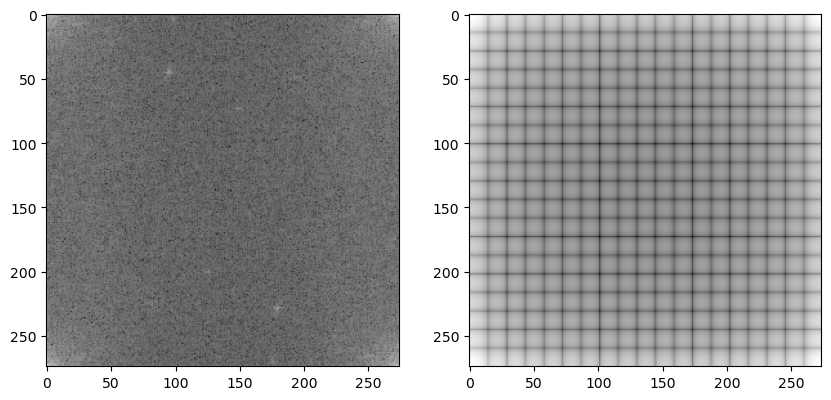

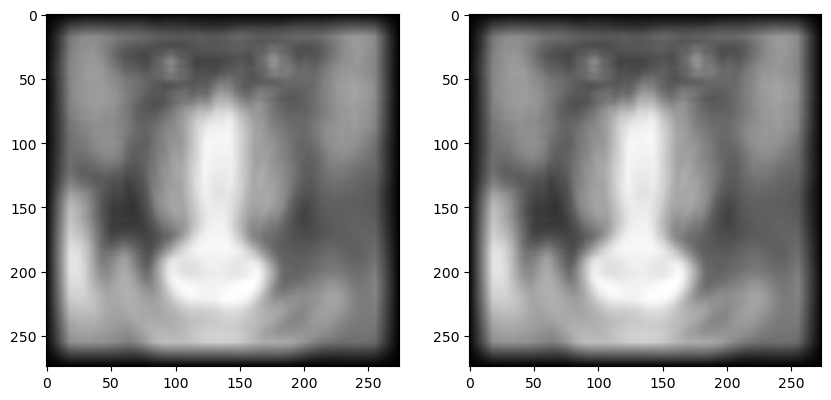

In [9]:
# Your answer here ...
Y = np.fft.fft2(monkey, s=vt.shape)
H = np.fft.fft2(h, s=vt.shape)
Vf = Y*H

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(Y)), cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(H)), cmap = 'gray')
plt.show()


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(vt, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(np.fft.ifft2(Vf)), cmap = 'gray')
plt.show()


From the plots above: 
- Explain the shape of the absolute value of the Fourier Transforms.
- Compare the results of $v_t$ and $v_f$.
- Explain why we need to specify a number of points for the Fourier Transforms computations.

**Answer of 2.3 -** 
 - The absolute value of the Fourier Transforms is characterized by patterns of intensity (color of pixels), and the image of absolute value of H is divided into $19\times19$ square grids.
 - The results of  $v_t$ and $v_f$ look the same, which means we get the same results by calculating the convolution and calculating the Fourier Transform.
 - If we do NOT specify a number of points and calculate the Fourier Transforms, the results we get is a Y (size $256\times256$) and a H (size $19\times19$ ), thus we can NOT multiply them.

Finally, let's compute the signal $v_f$ with the Fourier Transforms computed on a grid of size $(M_1, M_2)$. Repeat the operations of the previous point with a grid of size $(M_1, M_2)$ instead of $(L_1, L_2)$ and plot the results. 

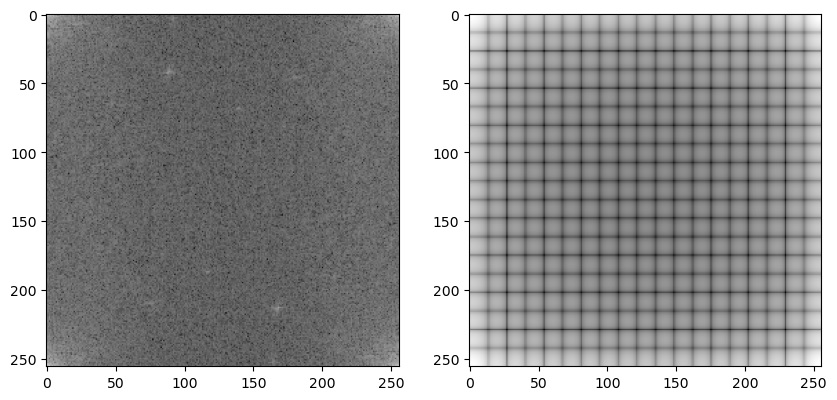

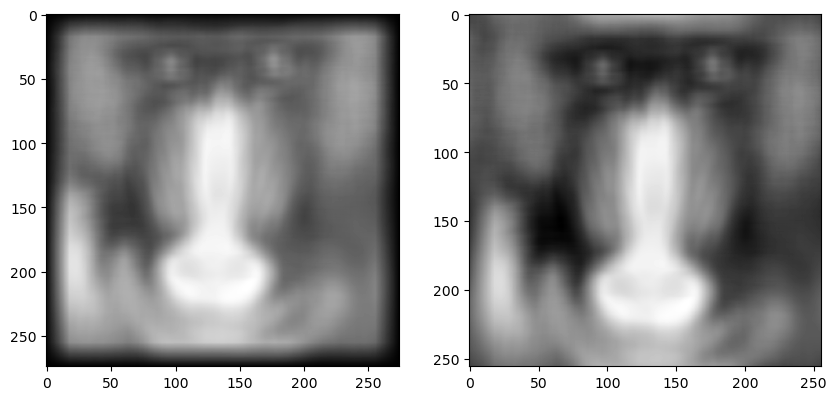

In [10]:
# Your answer here ...
Y = np.fft.fft2(monkey, s=monkey.shape)
H = np.fft.fft2(h, s=monkey.shape)
Vf = Y*H

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(Y)), cmap = 'gray')

#plt.imshow(vt, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(H)), cmap = 'gray')
plt.show()


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(vt, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(np.fft.ifft2(Vf)), cmap = 'gray')
plt.show()


From the plots above: 
- Explain the differences between the new and the previous Fourier transforms. What is the influence of the grid size?
- Compare the results of $v$.

**Answer of 2.3 -** 
 - The decrease of the grid size makes the size of results of Fourier transforms become smaller as well (decrease from 274 to 256). Since the grid size determines the resolution of the frequency domain representation, we may reduce the accuracy.
 - Some of the edges of the image of $v_f$ are missing and the contrast of the image seems to be higher.